In [1]:
# Note, this must remain a notebook to produce the inline graphs

import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from FeatureEngineer import getFeaturedData

O2K


In [2]:
# for sales plot we don't need to generate the files (generateFiles = False)
# nor do we need the 'advanced' features for temperature/rain and holidays (this makes it faster) (advancedFeatures = False)
sales_with_nan = getFeaturedData(fillMissingSales = False, generateFiles = False, advancedFeatures = False)
sales_without_nan = getFeaturedData(fillMissingSales = True, generateFiles = False, advancedFeatures = False)

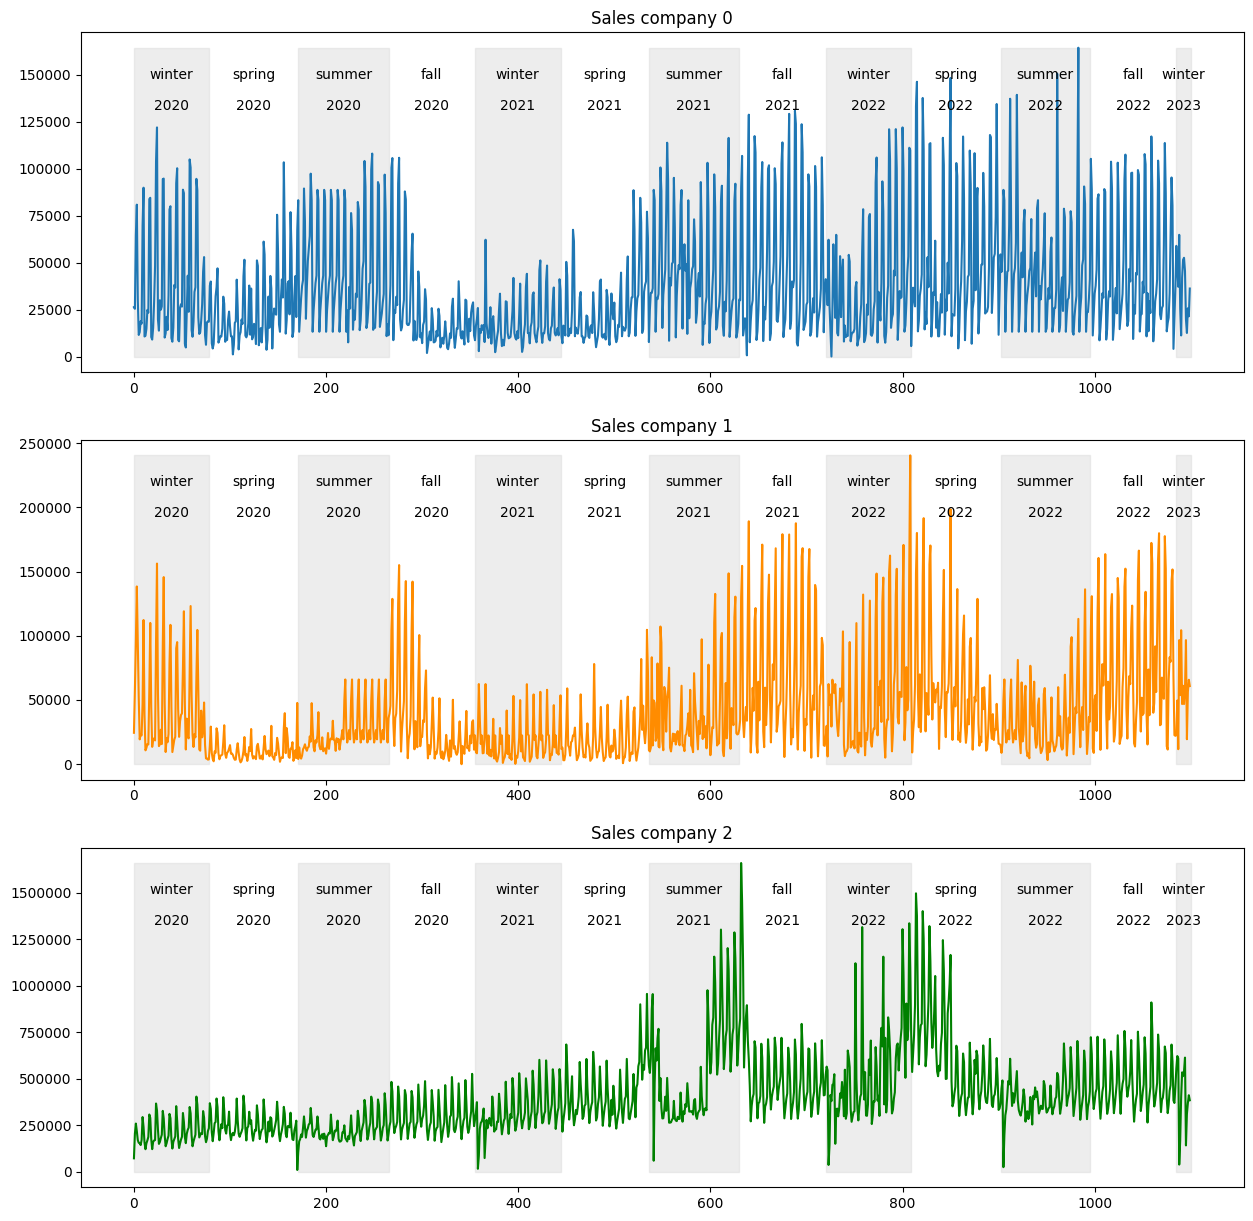

In [10]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout()

simple_seasons = [
    len(pd.date_range(start = "2020-01-01", end = "2020-03-18")),
    len(pd.date_range(start = "2020-03-19", end = "2020-06-19")),
    len(pd.date_range(start = "2020-06-20", end = "2020-09-21")),
    len(pd.date_range(start = "2020-09-22", end = "2020-12-20")),
    len(pd.date_range(start = "2020-12-21", end = "2021-03-19")),
    len(pd.date_range(start = "2021-03-20", end = "2021-06-19")),
    len(pd.date_range(start = "2021-06-20", end = "2021-09-21")),
    len(pd.date_range(start = "2021-09-22", end = "2021-12-20")),
    len(pd.date_range(start = "2021-12-21", end = "2022-03-19")),
    len(pd.date_range(start = "2022-03-20", end = "2022-06-20")),
    len(pd.date_range(start = "2022-06-21", end = "2022-09-21")),
    len(pd.date_range(start = "2022-09-22", end = "2022-12-20")),
    len(pd.date_range(start = "2022-12-21", end = "2023-01-04"))
]
seasons = simple_seasons

df = sales_without_nan

for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1)
    ax.set_title(f"Sales company {i}")
    ax.ticklabel_format(style = "plain")
    
    sales = df[df["Company"] == i]["Sales"]
    max_sales = np.max(sales, axis=0).astype(int)
    
    dx = 0
    for l in range(len(seasons)):
        if (l + 1) % 4 == 1:
            color = "gainsboro"
            label = "winter"
        elif (l + 1) % 4 == 2:
            color = "white"
            label = "spring"
        elif (l + 1) % 4 == 3:
            color = "gainsboro"
            label = "summer"
        elif (l + 1) % 4 == 0:
            color = "white"
            label = "fall"
        
        ax.text(dx + seasons[l]/2, max_sales * 0.9, label, horizontalalignment = "center")
        ax.text(dx + seasons[l]/2, max_sales * 0.8, (2020 + np.floor(l/4)).astype(int), horizontalalignment = "center")
        if l % 2 == 0:
            ax.add_patch(Rectangle((dx, 0), seasons[l], max_sales, alpha = 0.5, color = color))
        dx += seasons[l]
    
    line_color = ""
    if i == 1:
        line_color = "darkorange"
    elif i == 2:
        line_color = "green"
    ax.plot(range(len(sales)), sales, line_color)
    # use this line to compare with these since salary, it can be seen this indeed has an influence on sales
    #ax.plot(range(len(sales)), df[df["Company"] == i]["DaysSinceSalary"] / 31 * max_sales * 0.2)
    

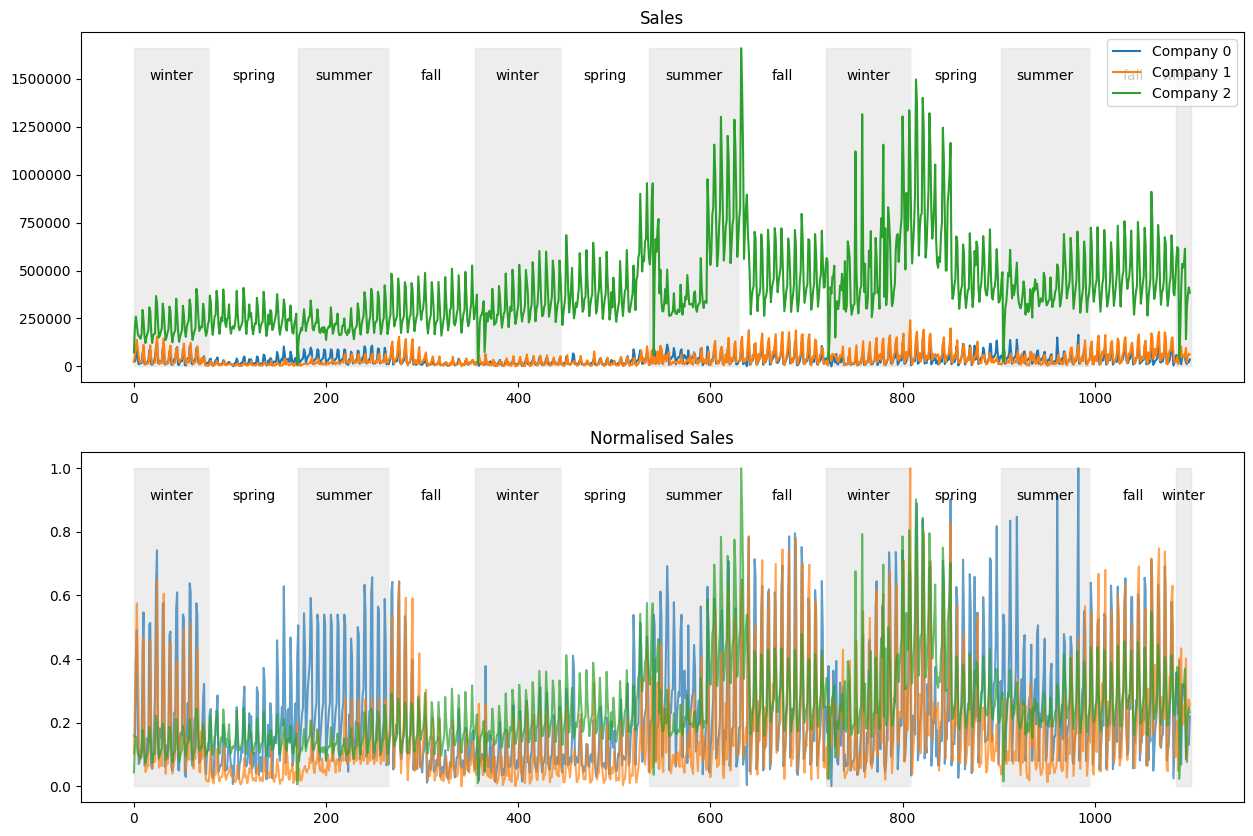

In [11]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout()

for i in range(2):
    ax = fig.add_subplot(2, 1, i + 1)
    ax.set_title(("Normalised " if i == 1 else "") + "Sales")
    ax.ticklabel_format(style = "plain")
    
    max_sales = np.max(df["Sales"], axis = 0).astype(int)
    if i == 1:
        max_sales = 1
    
    dx = 0
    for l in range(len(seasons)):
        if (l + 1) % 4 == 1:
            color = "gainsboro"
            label = "winter"
        elif (l + 1) % 4 == 2:
            color = "white"
            label = "spring"
        elif (l + 1) % 4 == 3:
            color = "gainsboro"
            label = "summer"
        elif (l + 1) % 4 == 0:
            color = "white"
            label = "fall"
        
        ax.text(dx + seasons[l]/2, max_sales * 0.9, label, horizontalalignment = "center")
        ax.add_patch(Rectangle((dx, 0), seasons[l], max_sales, alpha = 0.5, color = color))
        dx += seasons[l]
        
    for l in range(3):
        sales = df[df["Company"] == l]["Sales"]
        max_sales = np.max(sales, axis = 0).astype(int)
        opacity = 1
        
        if i == 1:
            sales = sales / max_sales
            opacity = 0.7
    
        ax.plot(range(len(sales)), sales, alpha = opacity, label=f"Company {l}")
        
    if i == 0:
        ax.legend()